# Time series Smoothing in Python

In [1]:
# Import Important Libraries, here we have import numpy,pandas,matplotlib,seaborn,ExponentialSmoothing,SimpleExpSmoothing, Holt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
# Use of Exponential Smoothing Library: Exponential smoothing is a time series forecasting method for univariate data that can be extended to support data with a systematic trend or seasonal component.
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [3]:
# Set Path of Local System
os.chdir('E:\\prasad\\SMIIT\\Working Project\\Time Series Analysis')

In [4]:
# Load Dataset
# https://www.kaggle.com/shenba/electricity-production
df=pd.read_csv('Electric_Production.csv')

In [5]:
# Check Shape of Dataset
df.shape

(397, 2)

In [6]:
# Check Null Values
df.isnull().sum()

DATE     0
UNITS    0
dtype: int64

In [7]:
# Check first five Rows
df.head()

,DATE,UNITS
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [8]:
# Check the type of Date Column
type(df['DATE'])

pandas.core.series.Series

In [9]:
# Check Data types of Df
df.dtypes

DATE      object
UNITS    float64
dtype: object

In [10]:
# Convert Date Column in datetime format
df['DATE']=pd.to_datetime(df['DATE'])

In [11]:
# show first 5 rows
df.head()

,DATE,UNITS
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [12]:
# Rename Columns 'DATE':'Date' and 'IPG2211A2N':'Units'
df.rename(columns={'DATE':'Date','UNITS':'Units'},inplace=True)

In [13]:
# Set the index of Date column
df.set_index('Date',inplace=True)

In [14]:
# print first five rows
df.head()

,Units
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [15]:
# check the Shape of DF
df.shape

(397, 1)

## Moving Average Method

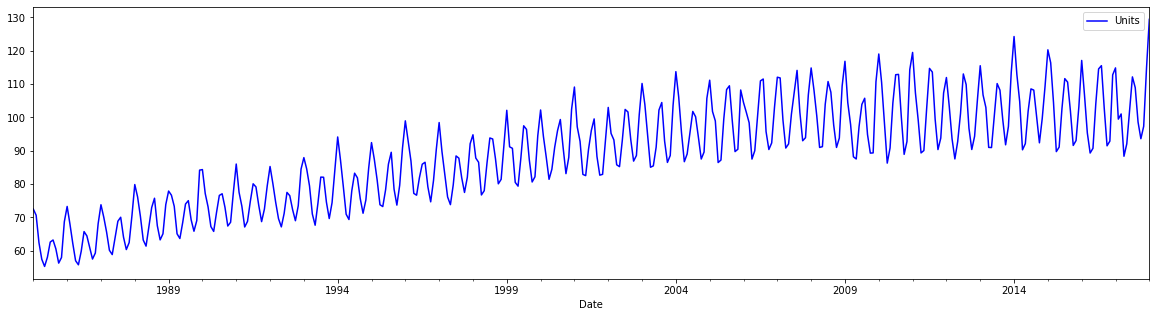

In [16]:
# Visualize Dataframe
df.plot(figsize=(20,5),color='Blue')
plt.show()

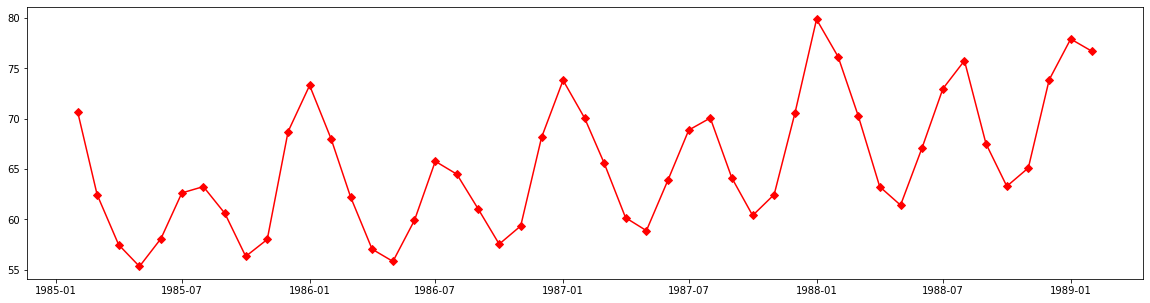

In [17]:
# Visualize first 50 records of UNITS column
plt.figure(figsize=(20,5))
plt.plot(df[1:50]['Units'],color='Red',marker='D')
plt.show()

### Rolling Average Transform

In [18]:
rolling_series=df[1:50].rolling(window=5)

In [19]:
# Finding Rolling Mean
rolling_mean=rolling_series.mean() 

In [20]:
print(rolling_mean.head(10))

               Units
Date                
1985-02-01       NaN
1985-03-01       NaN
1985-04-01       NaN
1985-05-01       NaN
1985-06-01  60.79982
1985-07-01  59.18946
1985-08-01  59.34912
1985-09-01  59.97176
1985-10-01  60.17182
1985-11-01  60.15384


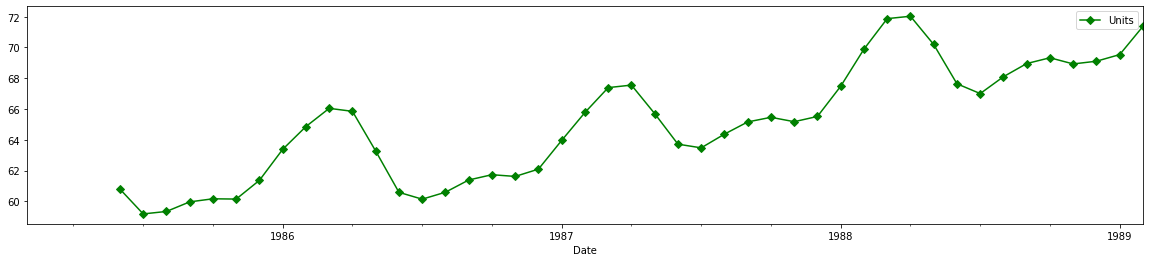

In [21]:
rolling_mean.plot(figsize=(20,4),color='Green',marker='D')
plt.show()

## Simple Exponential Smoothing

In [22]:
warnings.filterwarnings('ignore')

In [23]:
data=df[1:50]
fit1=SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fit2=SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

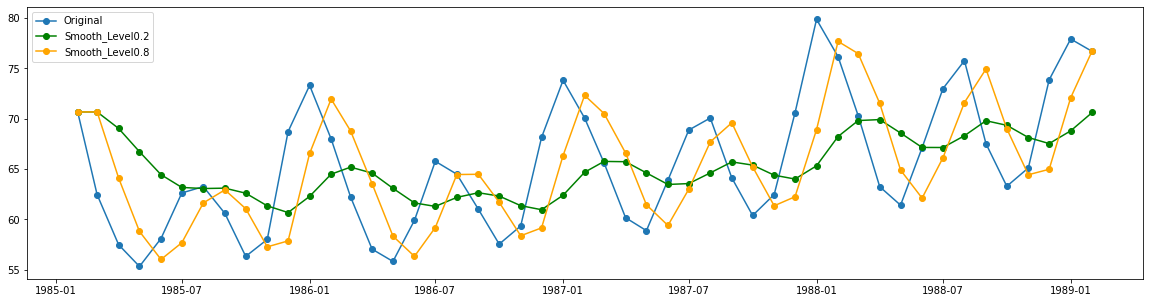

In [24]:
plt.figure(figsize=(20,5))
plt.plot(data,marker='o',label='Original')
plt.plot(fit1.fittedvalues,marker='o',label='Smooth_Level0.2',color='Green')
plt.plot(fit2.fittedvalues,marker='o',label='Smooth_Level0.8',color='Orange')
plt.legend()
plt.show()

## Holt Method for Exponential Smoothing

In [25]:
fit3=Holt(data).fit() #Linear Trend means No Exponential Trend
fit4=Holt(data,exponential=True).fit() # exponential Trend

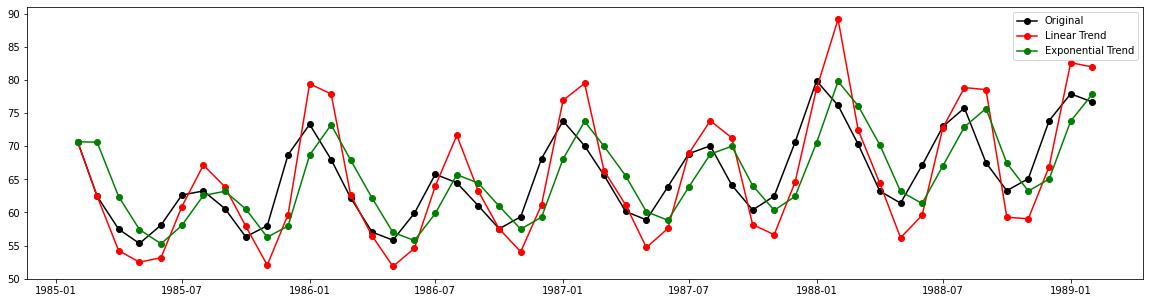

In [26]:
plt.figure(figsize=(20,5))
plt.plot(data,marker='o',label='Original',color='Black')
plt.plot(fit3.fittedvalues,marker='o',label='Linear Trend',color='Red')
plt.plot(fit4.fittedvalues,marker='o',label='Exponential Trend',color='Green')
plt.legend()
plt.show()

# Time Series Decomposition and stationarity Check in Python

In [27]:
# Import Important Libraries Seasonal and Seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [28]:
# Load Dataset Australian Drug Sales
df=pd.read_csv('TimeSeries.csv', parse_dates=['Date'],index_col='Date')
df.head()

,Value
Date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869


In [29]:
# Check Shape of Data
df.shape

(204, 1)

In [30]:
# Reset the index
df.reset_index(inplace=True)

In [31]:
df.head()

,Date,Value
0,1991-01-07,3.526591
1,1991-01-08,3.180891
2,1991-01-09,3.252221
3,1991-01-10,3.611003
4,1991-01-11,3.565869


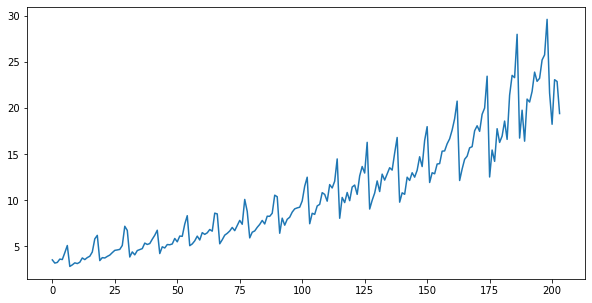

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df['Value'])
plt.show()

### Multiplicative Decomposition

In [33]:
# Multiplicative Decomposition
mul_result = seasonal_decompose(df['Value'], model='multiplicative',period=1)

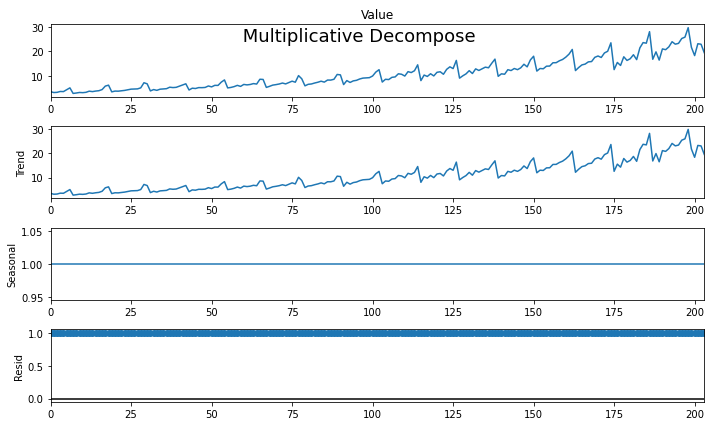

In [34]:
plt.rcParams.update({'figure.figsize': (10,6)})
mul_result.plot().suptitle('\n Multiplicative Decompose',fontsize=18)
plt.show()

### Additive Decomposition

In [35]:
# Additive Decomposition
add_result = seasonal_decompose(df['Value'], model='additive',period=1)

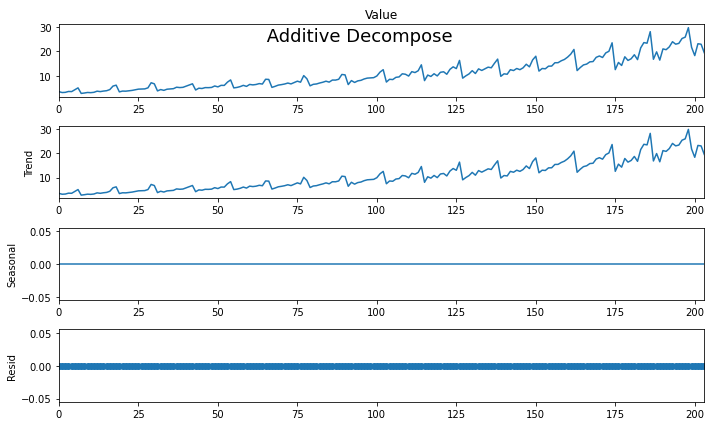

In [36]:
plt.rcParams.update({'figure.figsize': (10,6)})
add_result.plot().suptitle('\n Additive Decompose',fontsize=18)
plt.show()

In [37]:
#Additive
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head(5)

,seasoanilty,trend,residual,actual_values
0,0.0,3.526591,0.0,3.526591
1,0.0,3.180891,0.0,3.180891
2,0.0,3.252221,0.0,3.252221
3,0.0,3.611003,0.0,3.611003
4,0.0,3.565869,0.0,3.565869


In [38]:
#Multiplicative
new_df_mult = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_mult.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_mult.head(5)

,seasoanilty,trend,residual,actual_values
0,1.0,3.526591,1.0,3.526591
1,1.0,3.180891,1.0,3.180891
2,1.0,3.252221,1.0,3.252221
3,1.0,3.611003,1.0,3.611003
4,1.0,3.565869,1.0,3.565869


# Stationarity

### Adfuller Test for Stationarity

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
# Definition of stationarity - constant mean and variance
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis

In [41]:
adfuller_result=adfuller(df['Value'].values,autolag='AIC')

In [42]:
print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.14518568930673
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


### Another Method use

In [43]:
import statsmodels.tsa.stattools as sts

In [44]:
sts.adfuller(df['Value'])

(3.14518568930673,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364172)

## Thank You!!!